<a href="https://colab.research.google.com/github/utkarsh-G-23/cvlab-tues/blob/main/lab1/e22cseu1396/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr

# Step 1: Load & Preprocess Data
def load_data():
    (x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
    x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
    x_train, x_test = np.mean(x_train, axis=-1, keepdims=True), np.mean(x_test, axis=-1, keepdims=True)  # Convert to grayscale
    return x_train, x_test

x_train, x_test = load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [2]:
# Step 2: Simulate Degradation
def degrade_images(images):
    degraded_images = []
    for img in images:
        img = random_noise(img, mode='gaussian', var=0.02)  # Adding Gaussian Noise
        img = cv2.GaussianBlur(img, (5, 5), 1.0)  # Adding Gaussian Blur
        degraded_images.append(img)
    return np.array(degraded_images)

x_train_noisy = degrade_images(x_train)
x_test_noisy = degrade_images(x_test)

In [7]:
# # Step 3: Build the Autoencoder Model
# def build_autoencoder():
#     input_layer = keras.Input(shape=(32, 32, 1))

#     # Encoder
#     x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
#     x = layers.MaxPooling2D((2, 2), padding='same')(x)
#     x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = layers.MaxPooling2D((2, 2), padding='same')(x)

#     # Decoder
#     x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = layers.UpSampling2D((2, 2))(x)
#     x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#     x = layers.UpSampling2D((2, 2))(x)
#     output_layer = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#     return keras.Model(input_layer, output_layer)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

def build_autoencoder():
    input_layer = keras.Input(shape=(32, 32, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    output_layer = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return keras.Model(input_layer, output_layer)

# Build and compile the model
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0164 - val_loss: 0.0063
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/ste

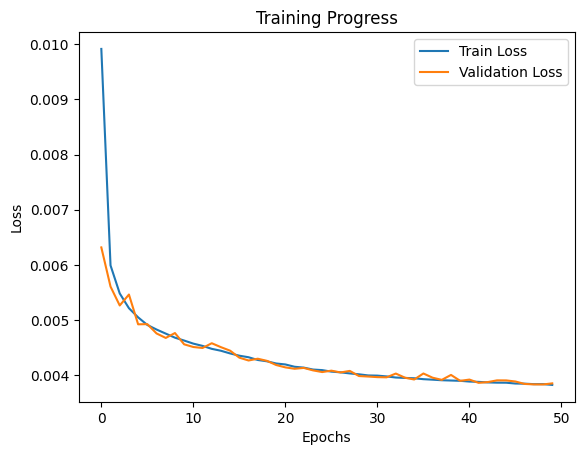

In [8]:
# # Step 4: Train the Model
# autoencoder = build_autoencoder()
# autoencoder.compile(optimizer='adam', loss='mse')

# autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_data=(x_test_noisy, x_test))
# Early stopping to prevent overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=50,  # Increased epochs
    batch_size=128,
    validation_data=(x_test_noisy, x_test),
    callbacks=[early_stopping],  # Added early stopping
    verbose=1
)

# Plot Training Progress
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()


In [9]:
# Step 5: Image Restoration & Evaluation
def evaluate_restoration(model, x_noisy, x_original):
    x_restored = model.predict(x_noisy)

    # Display original, noisy, and restored images
    fig, axes = plt.subplots(3, 10, figsize=(15, 5))
    for i in range(10):
        axes[0, i].imshow(x_original[i].squeeze(), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(x_noisy[i].squeeze(), cmap='gray')
        axes[1, i].axis('off')
        axes[2, i].imshow(x_restored[i].squeeze(), cmap='gray')
        axes[2, i].axis('off')

    plt.show()

    # Compute PSNR
    psnr_values = [psnr(x_original[i], x_restored[i]) for i in range(len(x_original))]
    print(f'Average PSNR: {np.mean(psnr_values):.2f} dB')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


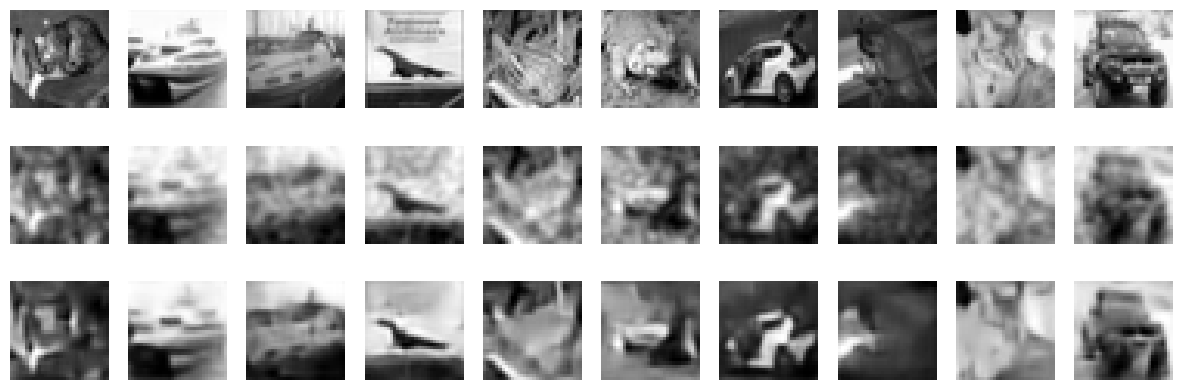

Average PSNR: 24.44 dB


In [10]:
evaluate_restoration(autoencoder, x_test_noisy, x_test)

# **Task - 2**

In [11]:
!pip install tensorflow keras matplotlib


In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize images to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train, y_test = to_categorical(y_train, 100), to_categorical(y_test, 100)

print(f"Training samples: {x_train.shape[0]}, Testing samples: {x_test.shape[0]}")
print(f"Image shape: {x_train.shape[1:]}")


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training samples: 50000, Testing samples: 10000
Image shape: (32, 32, 3)


In [16]:
from tensorflow.keras import models, layers

def build_alexnet():
    model = models.Sequential([
        layers.Conv2D(96, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.MaxPooling2D((2,2), strides=2),

        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2), strides=2),

        layers.Conv2D(384, (3,3), activation='relu', padding='same'),
        layers.Conv2D(384, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2), strides=2),  # Reduced pooling to prevent excessive downsampling

        layers.Flatten(),
        layers.Dense(1024, activation='relu'),  # Reduced neurons for small input size
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

alexnet = build_alexnet()
alexnet.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,093,156 (30.87 MB)

 Trainable params: 8,093,156 (30.87 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

# Load VGG16 without the top layer
base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom classification head
x = Flatten()(base_vgg.output)
x = Dense(512, activation='relu')(x)
x = Dense(100, activation='softmax')(x)  # 100 classes for CIFAR-100

vgg16 = Model(inputs=base_vgg.input, outputs=x)
vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vgg16.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,028,644 (57.33 MB)

 Trainable params: 15,028,644 (57.33 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train AlexNet
history_alex = alexnet.fit(
    x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping]
)

# Train VGG16
history_vgg = vgg16.fit(
    x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping]
)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.0153 - loss: 4.5194 - val_accuracy: 0.0648 - val_loss: 4.0090
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.0667 - loss: 4.0095 - val_accuracy: 0.1343 - val_loss: 3.6696
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.1303 - loss: 3.6377 - val_accuracy: 0.1936 - val_loss: 3.3419
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.1856 - loss: 3.3231 - val_accuracy: 0.2557 - val_loss: 2.9884
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2370 - loss: 3.0561 - val_accuracy: 0.2875 - val_loss: 2.8322
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.2761 - loss: 2.8506 - val_accuracy: 0.3173 - val_loss: 2.6813
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.3131 - loss: 2.6604 - val_accuracy: 0.3537 - val_loss: 2.5459
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.3497 - loss: 2.4946 - 

In [19]:
# Evaluate AlexNet
alex_loss, alex_acc = alexnet.evaluate(x_test, y_test)
print(f"AlexNet - Test Accuracy: {alex_acc * 100:.2f}%")

# Evaluate VGG16
vgg_loss, vgg_acc = vgg16.evaluate(x_test, y_test)
print(f"VGG16 - Test Accuracy: {vgg_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4241 - loss: 2.2862
AlexNet - Test Accuracy: 42.02%
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3708 - loss: 2.5038
VGG16 - Test Accuracy: 36.13%


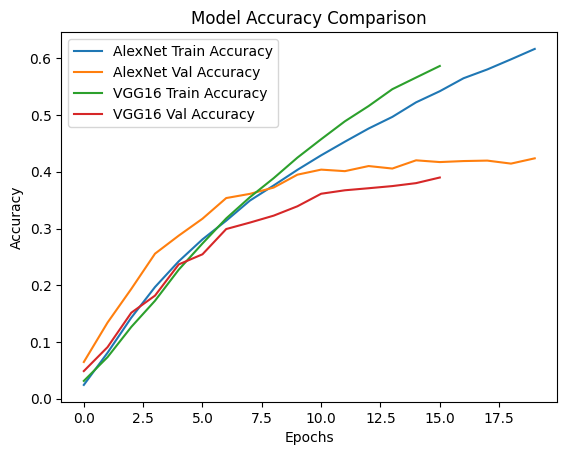

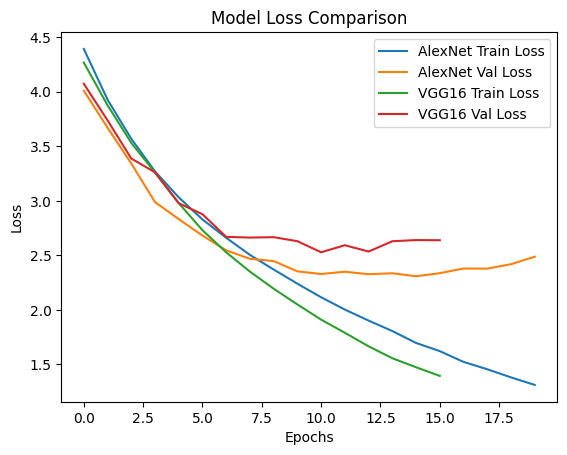

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_alex.history['accuracy'], label='AlexNet Train Accuracy')
plt.plot(history_alex.history['val_accuracy'], label='AlexNet Val Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG16 Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Comparison')
plt.show()

# Plot loss
plt.plot(history_alex.history['loss'], label='AlexNet Train Loss')
plt.plot(history_alex.history['val_loss'], label='AlexNet Val Loss')
plt.plot(history_vgg.history['loss'], label='VGG16 Train Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 Val Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Comparison')
plt.show()


now pretrained

In [21]:
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader

# Load AlexNet (Pretrained on ImageNet)
alexnet = models.alexnet(pretrained=True)

# Modify classifier for CIFAR-100
alexnet.classifier[6] = nn.Linear(4096, 100)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 165MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [25]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load VGG16 (Pretrained on ImageNet, without top layer)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add new classifier
x = Flatten()(base_model.output)
x = Dense(512, activation="relu")(x)
x = Dense(100, activation="softmax")(x)

# Create model
vgg16_model = Model(inputs=base_model.input, outputs=x)

# Compile
vgg16_model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])


In [23]:
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)

# Dataloaders for CIFAR-100
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for AlexNet input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = CIFAR100(root="./data", train=True, transform=transform, download=True)
testset = CIFAR100(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(trainset, batch_size=128, shuffle=True)
test_loader = DataLoader(testset, batch_size=128, shuffle=False)

# Train AlexNet for 10 epochs
for epoch in range(10):
    alexnet.train()
    running_loss = 0.0
    correct, total = 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch [{epoch+1}/10] - Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")


100%|██████████| 169M/169M [00:13<00:00, 12.6MB/s]


Epoch [1/10] - Loss: 4.0095, Accuracy: 7.58%
Epoch [2/10] - Loss: 3.0907, Accuracy: 22.68%
Epoch [3/10] - Loss: 2.5918, Accuracy: 32.71%
Epoch [4/10] - Loss: 2.3101, Accuracy: 38.48%
Epoch [5/10] - Loss: 2.1358, Accuracy: 42.58%
Epoch [6/10] - Loss: 2.0164, Accuracy: 45.37%
Epoch [7/10] - Loss: 1.8885, Accuracy: 48.31%
Epoch [8/10] - Loss: 1.7813, Accuracy: 51.14%
Epoch [9/10] - Loss: 1.7058, Accuracy: 52.39%
Epoch [10/10] - Loss: 1.6398, Accuracy: 54.37%


In [26]:
history = vgg16_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.1631 - loss: 3.6780 - val_accuracy: 0.2899 - val_loss: 2.8680
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.3109 - loss: 2.7537 - val_accuracy: 0.3176 - val_loss: 2.7051
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.3523 - loss: 2.5532 - val_accuracy: 0.3394 - val_loss: 2.6236
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3759 - loss: 2.4526 - val_accuracy: 0.3425 - val_loss: 2.5921
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.3943 - loss: 2.3482 - val_accuracy: 0.3553 - val_loss: 2.5527
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4132 - loss: 2.2611 - val_accuracy: 0.3599 - val_loss: 2.5339
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.4317 - loss: 2.1778 - val_accuracy: 0.3644 - val_loss: 2.5254
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.4482 - loss: 2.1136 - v

In [27]:
alexnet.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"AlexNet Test Accuracy: {100 * correct/total:.2f}%")


AlexNet Test Accuracy: 48.06%


In [28]:
test_loss, test_acc = vgg16_model.evaluate(x_test, y_test)
print(f"VGG16 Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3794 - loss: 2.5051
VGG16 Test Accuracy: 37.86%
